In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.tabular import *
import sys
sys.path.append("../src")
import data_loader
import data_block

In [6]:
production = data_loader.from_zipfile("/Users/jpnelson/Downloads/sinopia_export_all_2020-05-04T22_03_43.280Z.zip")

Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/ucdavis_2020-05-04T22:03:44.322Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/northwestern_2020-05-04T22:03:55.130Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/cornell_2020-05-04T22:03:43.320Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/minnesota_2020-05-04T22:03:55.371Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/boulder_2020-05-04T22:03:57.903Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/chicago_2020-05-04T22:03:44.206Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/yale_2020-05-04T22:03:58.344Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/nlm_2020-05-04T22:03:53.737Z/complete.log
Failed to parse sinopia_export_all_2020-05-04T22:03:43.280Z/princeton_2020-05-04T22:03:43.517Z/complete.log
Failed to parse sinopia_export_all_2020-05-0

In [7]:
stage = data_loader.from_zipfile("/Users/jpnelson/Downloads/sinopia_export_all_2020-05-03T00_01_59.630Z.zip")

Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/ucsd_2020-05-03T00:01:59.670Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/boulder_2020-05-03T00:02:03.866Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/northwestern_2020-05-03T00:02:08.723Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/minnesota_2020-05-03T00:02:00.468Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/alberta_2020-05-03T00:02:07.369Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/ld4p_2020-05-03T00:02:22.272Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/princeton_2020-05-03T00:02:10.263Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/duke_2020-05-03T00:02:22.660Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00:01:59.630Z/frick_2020-05-03T00:02:12.193Z/complete.log
Failed to parse sinopia_export_all_2020-05-03T00

In [8]:
print(f"{len(production)} {len(stage)}")

2807 3742


In [10]:
prod_df = data_loader.to_dataframe(production)

.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600........

IndexError: list index out of range

In [ ]:
%debug

> /Users/jpnelson/2020/rdf-classify/src/data_loader.py(23)process_predicates()
     21                        resource_template: rdflib.URIRef) -> dict:
     22     data = { 'subject': subject_key,
---> 23              'group': urlparse(subject_key).path.split("/")[2],
     24              'resource_template': str(resource_template) }
     25     for predicate in predicates:



ipdb>  subject_key


'b0'


ipdb>  u


> /Users/jpnelson/2020/rdf-classify/src/data_loader.py(15)create_tensor()
     13     for subject, rt in rt_query:
     14         predicates = graph.predicates(subject=subject)
---> 15         data = process_predicates(str(subject), predicates, str(rt))
     16         listing .append(data)
     17     return listing



ipdb>  print(graph.serialize(format='turtle').decode())


@prefix as: <https://www.w3.org/ns/activitystreams#> .
@prefix ns1: <http://sinopia.io/vocabulary/> .
@prefix ns2: <http://id.loc.gov/ontologies/bibframe/> .
@prefix ns3: <http://rdaregistry.info/Elements/w/> .
@prefix ns4: <http://id.loc.gov/ontologies/bflc/> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://trellis.sinopia.io/repository/washington/5abb3bdf-0109-4b77-b984-f73900ae981e> a <http://rdaregistry.info/Elements/c/C10001> ;
    ns2:adminMetadata [ a ns2:AdminMetadata ;
            ns4:catalogerID "cec"@en ;
            ns4:encodingLevel <https://id.loc.gov/vocabulary/menclvl/f> ;
            ns2:creationDate "2019-09-25"@en ;
            ns2:descriptionConventions <https://id.loc.gov/vocabulary/descriptionConventions/isbd>,
                <https://id.loc.gov/vocabulary/descriptionConventions/rda> ;
            ns2:descriptionLanguage <http://id.loc.gov/vocabulary/languages/eng> ;
            ns2:source <https://id.loc

In [39]:
prod_df.head()

,subject,resource_template,http://id.loc.gov/ontologies/bibframe/title,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/editionStatement,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/date,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://id.loc.gov/ontologies/bibframe/extent,http://id.loc.gov/ontologies/bibframe/provisionActivityStatement,...,http://rdaregistry.info/Elements/m/P30335,http://id.loc.gov/ontologies/bibframe/Person,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bibframe/partName,http://www.loc.gov/mads/rdf/v1#streetAddress,http://creativecommons.org/ns#License,http://id.loc.gov/ontologies/bibframe/musicSerialNumber,http://schema.org/name,http://schema.org/isbn,http://www.loc.gov/mads/rdf/v1#authoritativeLabel
0,https://trellis.sinopia.io/repository/ucdavis/...,ld4p:RT:bf2:Monograph:Instance,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/ucdavis/...,ld4p:RT:bf2:Monograph:Instance,2.0,4.0,1.0,5.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/ucdavis/...,ld4p:RT:bf2:Monograph:Instance,2.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/ucdavis/...,ld4p:RT:bf2:Monograph:Instance,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/ucdavis/...,sinopia:resourceTemplate:schema:Thing,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
stage_df = data_loader.to_dataframe(stage)

.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700....

In [41]:
stage_df.head()

,subject,resource_template,http://id.loc.gov/ontologies/bibframe/heldBy,http://id.loc.gov/ontologies/bibframe/note,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/usageAndAccessPolicy,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/electronicLocator,http://id.loc.gov/ontologies/bibframe/itemOf,...,http://id.loc.gov/ontologies/bflc/profile,http://id.loc.gov/ontologies/bibframe/dissertation,http://id.loc.gov/ontologies/bflc/relation,http://id.loc.gov/ontologies/bibframe/itemPortion,http://id.loc.gov/ontologies/bibframe/ColorContent,http://rdaregistry.info/Elements/w/P10223,http://rdaregistry.info/Elements/w/P10256,http://rdaregistry.info/Elements/e/P20001,http://rdaregistry.info/Elements/e/P20310,http://id.loc.gov/ontologies/bibframe/acquisitionSource
0,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,2.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/uc...,ld4p:RT:bf2:Serial:Work:Un-nested,0.0,0.0,3.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,1.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Work:Un-nested,0.0,0.0,4.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,1.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
len(prod_df.keys())

311

In [43]:
len(stage_df.keys())

186

In [49]:
prod_data = data_block.databunch(prod_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:Agent:bfPerson, sinopia:resourceTemplate:bf2:Agents:Addresses:Extended, WAU:RT:RDA:Expression:serial, WAU:RT:RDA:Expression:soundRecording, WAU:RT:RDA:Item:serial...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [50]:
stage_data = data_block.databunch(stage_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:Item:Enumeration, WAU:RT:MADSRDF:COMPLEXSUBJECT, sinopia:resourceTemplate:bf2:Item:Retention, harvard:test3:RT:bf2:Monograph:Item:ItemForward, ld4p:RT:bf2:NotatedMusic:Instance...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


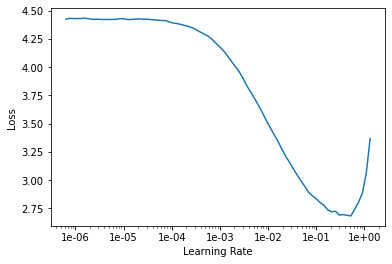

In [60]:
prod_learner = tabular_learner(prod_data, layers=[200,100], metrics=accuracy)
prod_learner.lr_find()
prod_learner.recorder.plot()

In [61]:
prod_learner.fit(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.384447,2.992812,0.863636,00:38
1,1.609184,0.631158,0.903409,00:35


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


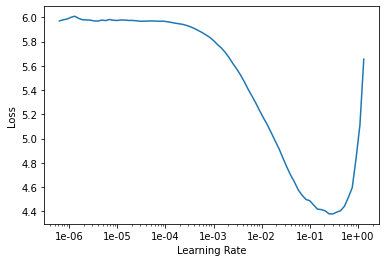

In [58]:
stage_learner = tabular_learner(stage_data, layers=[200,100], metrics=accuracy)
stage_learner.lr_find()
stage_learner.recorder.plot()

In [66]:
stage_learner.fit(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.897901,2.237767,0.431755,00:37
1,0.784005,2.356385,0.423398,00:36


In [67]:
stage_345 = stage_df.iloc[345]

In [68]:
stage_345

subject                                                                              b2
resource_template                                          ld4p:RT:bf2:MIBluRayDVD:Item
http://id.loc.gov/ontologies/bibframe/heldBy                                          0
http://id.loc.gov/ontologies/bibframe/note                                            0
http://www.w3.org/ns/prov#wasGeneratedBy                                              0
                                                                       ...             
http://rdaregistry.info/Elements/w/P10223                                             0
http://rdaregistry.info/Elements/w/P10256                                             0
http://rdaregistry.info/Elements/e/P20001                                             0
http://rdaregistry.info/Elements/e/P20310                                             0
http://id.loc.gov/ontologies/bibframe/acquisitionSource                               0
Name: 345, Length: 186, dtype: o

In [71]:
len(prod_learner.data.classes)

75

In [72]:
len(stage_learner.data.classes)

300

In [73]:
len(prod_df.keys())

311

In [74]:
len(stage_df.keys())

186

In [75]:
prod_learner.data.classes

['CornellSinatra45:Instance',
 'CornellSinatra45:Work',
 'PMO:RT:bf2:SoundRecording:Instance',
 'PMO:RT:bf2:SoundRecording:Work',
 'UAL:resourceTemplate:bf2:Monograph:Instance',
 'UAL:resourceTemplate:bf2:Monograph:Instance:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Item:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Opus',
 'UAL:resourceTemplate:bf2:Monograph:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Work',
 'UAL:resourceTemplate:bf2:Monograph:Work:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Instance',
 'UAL:resourceTemplate:bf2:Serial:Item',
 'UAL:resourceTemplate:bf2:Serial:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Work',
 'UChicago:RT:bf2:Monograph:Instance',
 'UChicago:RT:bf2:Monograph:Item',
 'UChicago:RT:bf2:Monograph:Work',
 'UMN:RT:BF2:AdminMetadata',
 'UMN:RT:bf2:Monograph:Instance:Un-nested',
 'UMN:RT:bf2:Monograph:Item:Un-nested',
 'WAU:RT:BF2:BFLC:AdminMetadata',
 'WAU:RT:RDA:Expression:dvdVideo',
 'WAU:RT:RDA:Expression:monograph',
 'WAU:RT:

In [87]:
len(prod_data.classes)

75

In [88]:
len(stage_data.classes)

300